In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [2]:
output_path = working_path = "out_path/"
output_path = working_path = "/home/acucena/Documentos/UFPI/ICV/Resultado/"
g = glob(output_path + '/maskedimages_*.npy')
id = ((g[0].split("_"))[1].split("."))[0]

In [3]:
imgs = np.load(g[0])

In [4]:
image_label_overlay = []
list_label = []
for image in imgs:
    try:
        thresh = threshold_otsu(image)
        bw = closing(image > thresh, square(3))
        cleared = clear_border(bw)
        label_image = label(cleared)
        list_label.append(label_image)
        image_label_overlay.append(label2rgb(label_image, image=image))
    except:
        break

/home/acucena/anaconda3/envs/ICV/lib/python3.6/site-packages/skimage/color/colorlabel.py:162: UserWarning: Negative intensities in `image` are not supported
  warn("Negative intensities in `image` are not supported")


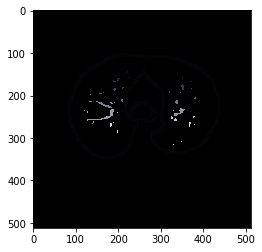

In [16]:
plt.imshow(list_label[85], cmap=plt.cm.bone)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


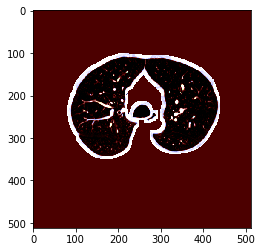

In [17]:
plt.imshow(image_label_overlay[85], cmap=plt.cm.bone)
plt.show()

In [49]:
np.save(output_path + "labelimage_%s.npy" % (id), list_label)